In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
pd.set_option("display.max_rows", None)

# Load the training dataset
train_data = pd.read_csv('reddit_exploded.csv')

In [139]:
train_data.head(10)

,Unnamed: 0,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,Num_Characters,Num_Characters_No_Whitespace,Fraction_Alphabetical,...,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,year,month,day,weekday,hour
0,0,israel,palestine,1x18ybs,2014-02-04 16:09:28,1,"386.0,346.0,0.782383419689,0.00518134715026,0....",386.0,346.0,0.782383,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014,2,4,1,16
1,1,vertcoin,cryptocurrency,1x19ums,2014-02-04 16:29:31,1,"2980.0,2651.0,0.718456375839,0.0345637583893,0...",2980.0,2651.0,0.718456,...,0.017660,0.000000,0.000000,0.002208,0.004415,2014,2,4,1,16
2,2,nofap,explainlikeimfive,1x1a2ws,2014-02-04 16:31:58,1,"692.0,589.0,0.796242774566,0.00578034682081,0....",692.0,589.0,0.796243,...,0.000000,0.000000,0.000000,0.008696,0.000000,2014,2,4,1,16
3,3,explainlikeimcalvin,pics,1x1amgs,2014-02-04 16:56:14,1,"111.0,106.0,0.747747747748,0.036036036036,0.04...",111.0,106.0,0.747748,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014,2,4,1,16
4,4,aneros,askgaybros,1x1ax9s,2014-02-04 05:50:03,1,"2312.0,1907.0,0.766868512111,0.00562283737024,...",2312.0,1907.0,0.766869,...,0.000000,0.000000,0.000000,0.004619,0.002309,2014,2,4,1,5
5,5,londonsocialclub,daftpunk,1x1b9as,2014-02-04 14:31:19,1,"553.0,493.0,0.739602169982,0.0379746835443,0.0...",553.0,493.0,0.739602,...,0.000000,0.010870,0.000000,0.000000,0.000000,2014,2,4,1,14
6,6,frisson,askreddit,1x1cdfs,2014-02-04 15:58:17,1,"697.0,595.0,0.771879483501,0.00286944045911,0....",697.0,595.0,0.771879,...,0.008065,0.008065,0.016129,0.000000,0.000000,2014,2,4,1,15
7,7,nootropics,nutrition,1x1d2qs,2014-02-04 17:12:48,1,"622.0,536.0,0.795819935691,0.0112540192926,0.0...",622.0,536.0,0.795820,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014,2,4,1,17
8,8,ecuador,iwantout,1x1d3ws,2014-02-04 07:41:34,1,"292.0,281.0,0.756849315068,0.027397260274,0.04...",292.0,281.0,0.756849,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014,2,4,1,7
9,9,iama,posthardcore,1x1ga3s,2014-02-04 17:38:33,1,"132.0,129.0,0.712121212121,0.030303030303,0.05...",132.0,129.0,0.712121,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014,2,4,1,17


In [140]:
# Describe the new DataFrame
property_descriptions = train_data.describe()

# Save property descriptions to a CSV file in the same folder
property_descriptions.to_csv('property_descriptions.csv')
property_descriptions.transpose().to_csv('property_descriptions_trans.csv')

In [141]:
property_descriptions.transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,281562.0,140780.500000,81280.092584,0.000000,70390.250000,140780.500000,211170.750000,281561.000000
LINK_SENTIMENT,281562.0,0.853048,0.521833,-1.000000,1.000000,1.000000,1.000000,1.000000
Num_Characters,281562.0,2073.501105,3570.372365,49.000000,357.000000,880.000000,2203.000000,41239.000000
Num_Characters_No_Whitespace,281562.0,1806.679133,3147.422913,49.000000,317.000000,762.000000,1900.000000,39369.000000
Fraction_Alphabetical,281562.0,0.751031,0.046729,0.027730,0.740741,0.761628,0.776316,0.994208
Fraction_Digits,281562.0,0.020901,0.023527,0.000026,0.006812,0.014035,0.027108,0.850770
Fraction_Uppercase,281562.0,0.041578,0.028857,0.000505,0.026101,0.035714,0.049840,0.981876
Fraction_Whitespace,281562.0,0.126616,0.051062,0.000126,0.096386,0.138596,0.163098,0.760666
Fraction_Special_Characters,281562.0,0.101451,0.051345,0.001277,0.061082,0.088455,0.136190,0.827663
Num_Words,281562.0,327.602215,557.259282,8.000000,54.250000,142.000000,356.000000,7600.000000



Distribution of posts per source subreddit:
SOURCE_SUBREDDIT
subredditdrama          4601
circlebroke             2264
shitliberalssay         1968
outoftheloop            1934
copypasta               1816
writingprompts          1676
hailcorporate           1460
circlejerkcopypasta     1443
conspiracy              1440
bestofoutrageculture    1354
Name: count, dtype: int64

Distribution of posts per target subreddit:
TARGET_SUBREDDIT
askreddit          7121
iama               3536
pics               2669
writingprompts     2469
leagueoflegends    2396
videos             2384
todayilearned      2296
worldnews          2207
funny              1971
news               1737
Name: count, dtype: int64


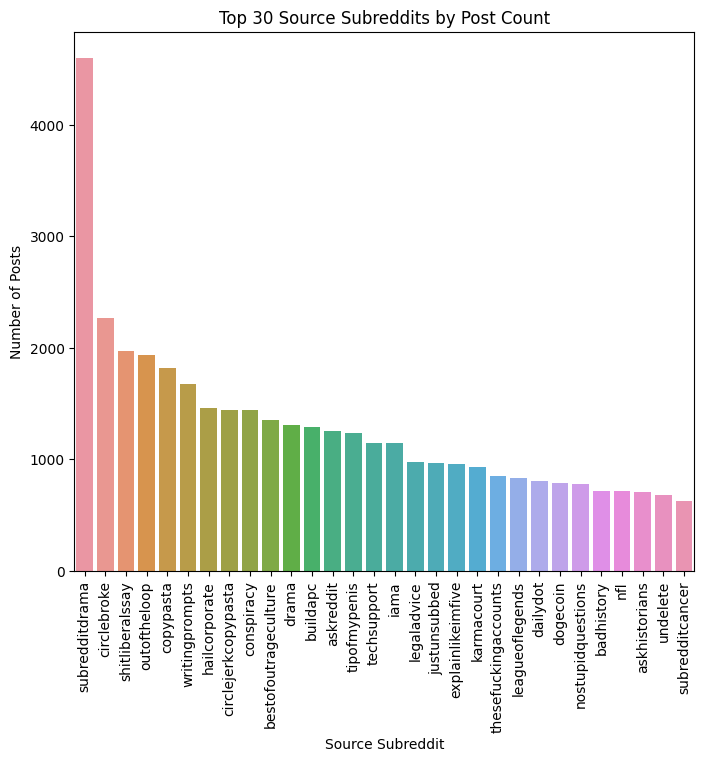

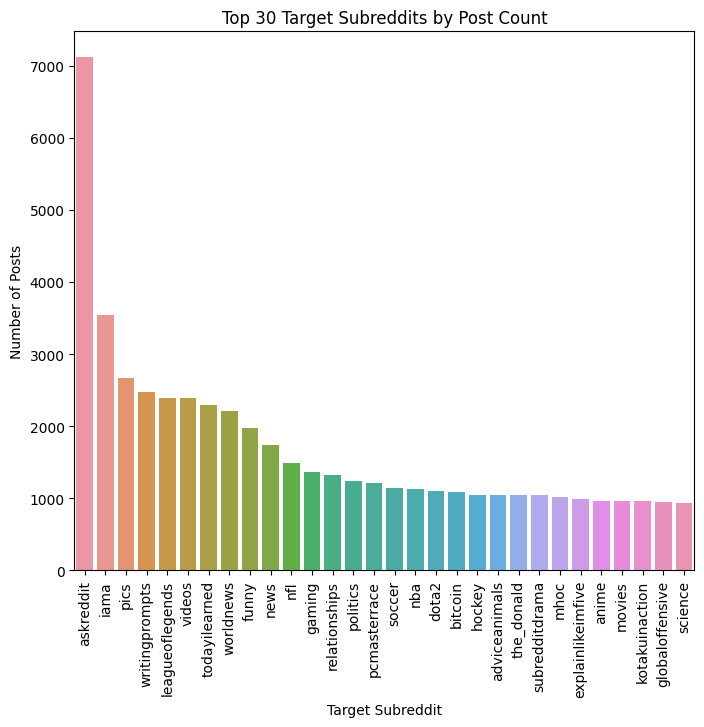

In [142]:
# Analyze the distribution of posts per source subreddit
source_subreddit_counts = train_data['SOURCE_SUBREDDIT'].value_counts()
print("\nDistribution of posts per source subreddit:")
print(source_subreddit_counts.head(10))

# Analyze the distribution of posts per target subreddit
target_subreddit_counts = train_data['TARGET_SUBREDDIT'].value_counts()
print("\nDistribution of posts per target subreddit:")
print(target_subreddit_counts.head(10))

headsize = 30

# Visualize the distribution of posts per source subreddit
plt.figure(figsize=(8, 7))
sns.barplot(x=source_subreddit_counts.head(headsize).index, y=source_subreddit_counts.head(headsize).values)
plt.xticks(rotation=90)
plt.xlabel('Source Subreddit')
plt.ylabel('Number of Posts')
plt.title(f'Top {headsize} Source Subreddits by Post Count')
plt.show()

# Visualize the distribution of posts per target subreddit
plt.figure(figsize=(8, 7))
sns.barplot(x=target_subreddit_counts.head(headsize).index, y=target_subreddit_counts.head(headsize).values)
plt.xticks(rotation=90)
plt.xlabel('Target Subreddit')
plt.ylabel('Number of Posts')
plt.title(f'Top {headsize} Target Subreddits by Post Count')
plt.show()


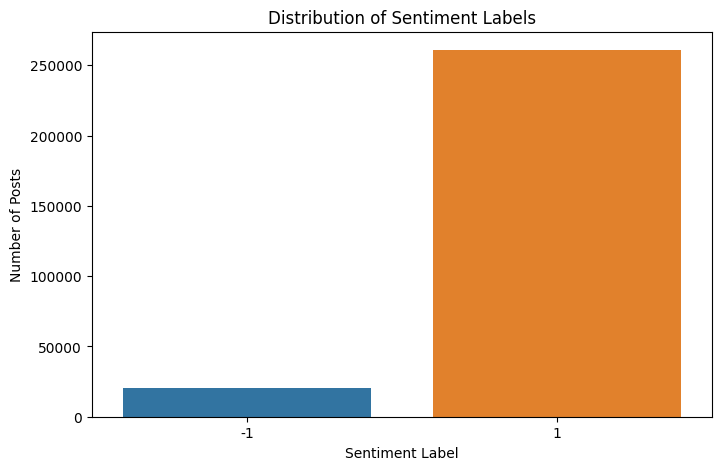

In [143]:
# Visualize the distribution of sentiment labels
plt.figure(figsize=(8, 5))
sns.countplot(x='LINK_SENTIMENT', data=train_data)
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Posts')
plt.title('Distribution of Sentiment Labels')
plt.show()


In [144]:
source_subreddit_counts.describe()

count    27606.000000
mean        10.199304
std         58.019926
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4601.000000
Name: count, dtype: float64

In [145]:
target_subreddit_counts.describe()

count    20447.000000
mean        13.770333
std         90.928988
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       7121.000000
Name: count, dtype: float64

In [146]:
len(pd.unique(pd.concat([train_data['SOURCE_SUBREDDIT'], train_data['TARGET_SUBREDDIT']])))

35465

In [147]:
len(train_data[train_data['LINK_SENTIMENT'] == 1])

260874

In [148]:
len(train_data[train_data['LINK_SENTIMENT'] == -1])

20688

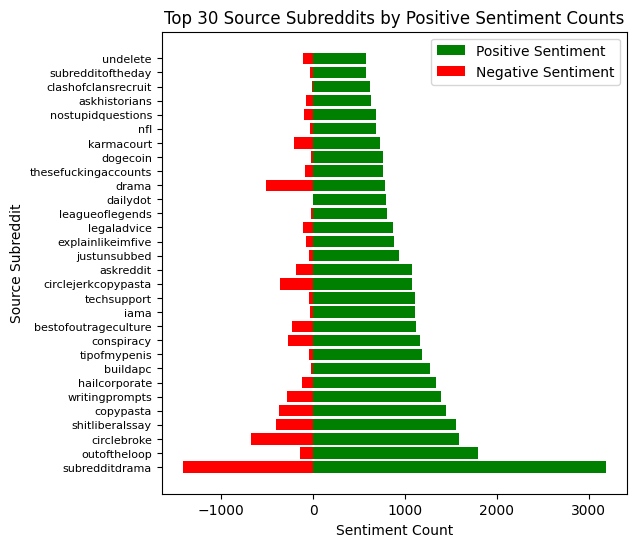

In [149]:
# Group by source subreddit and calculate the number of positive and negative sentiments
sentiment_counts = train_data.groupby(['SOURCE_SUBREDDIT', 'LINK_SENTIMENT']).size().unstack(fill_value=0)

# Sort source subreddits by the number of positive sentiments
sorted_source_subreddits = sentiment_counts[1].sort_values(ascending=False)
# Take the top `headsize` source subreddits with the most positive sentiments
top_source_subreddits = sorted_source_subreddits.head(headsize)
# Get the corresponding number of negative sentiments for the top source subreddits
negative_sentiments = sentiment_counts.loc[top_source_subreddits.index, -1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
# Plot the top source subreddits with positive and negative sentiments
ax.barh(top_source_subreddits.index, top_source_subreddits.values, color='green', label='Positive Sentiment')
ax.barh(top_source_subreddits.index, -negative_sentiments.values, color='red', label='Negative Sentiment')
# Set labels and title
ax.set_xlabel('Sentiment Count')
ax.set_ylabel('Source Subreddit')
ax.set_title(f'Top {headsize} Source Subreddits by Positive Sentiment Counts')

# Add a legend
ax.legend()
# Show the plot
plt.yticks(fontsize=8)
plt.show()

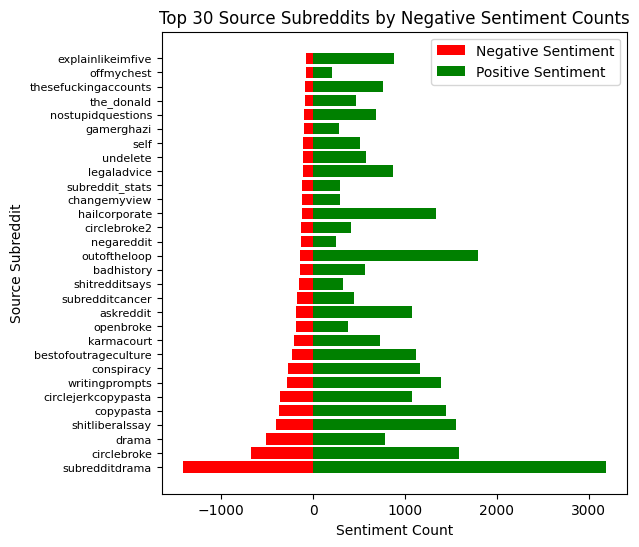

In [150]:

# Sort source subreddits by the number of negative sentiments
sorted_source_subreddits = sentiment_counts[-1].sort_values(ascending=False)
# Take the top `headsize` source subreddits with the most negative sentiments
top_source_subreddits = sorted_source_subreddits.head(headsize)
# Get the corresponding number of positive sentiments for the top source subreddits
positive_sentiments = sentiment_counts.loc[top_source_subreddits.index, 1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
# Plot the top source subreddits with negative and positive sentiments
ax.barh(top_source_subreddits.index, -top_source_subreddits.values, color='red', label='Negative Sentiment')
ax.barh(top_source_subreddits.index, positive_sentiments.values, color='green', label='Positive Sentiment')
# Set labels and title
ax.set_xlabel('Sentiment Count')
ax.set_ylabel('Source Subreddit')
ax.set_title(f'Top {headsize} Source Subreddits by Negative Sentiment Counts')

# Add a legend
ax.legend()

# Show the plot
plt.yticks(fontsize=8)
plt.show()

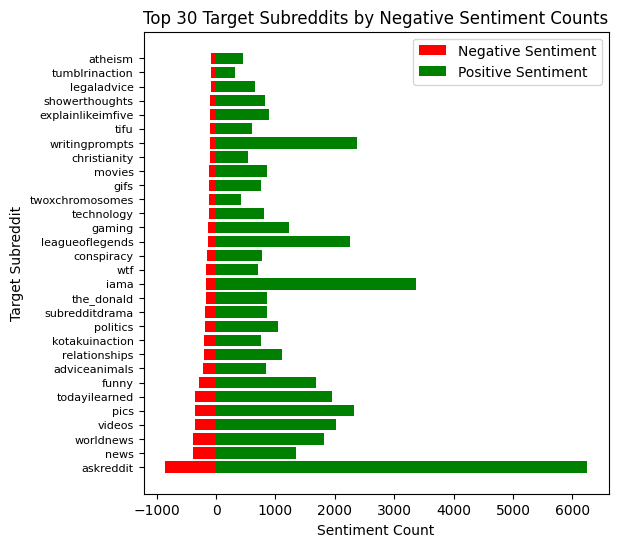

In [151]:
# Group by target subreddit and calculate the number of positive and negative sentiments
sentiment_counts = train_data.groupby(['TARGET_SUBREDDIT', 'LINK_SENTIMENT']).size().unstack(fill_value=0)

# Sort target subreddits by the number of negative sentiments
sorted_target_subreddits = sentiment_counts[-1].sort_values(ascending=False)
# Take the top `headsize` target subreddits with the most negative sentiments
top_target_subreddits = sorted_target_subreddits.head(headsize)
# Get the corresponding number of positive sentiments for the top target subreddits
positive_sentiments = sentiment_counts.loc[top_target_subreddits.index, 1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
# Plot the top target subreddits with negative and positive sentiments
ax.barh(top_target_subreddits.index, -top_target_subreddits.values, color='red', label='Negative Sentiment')
ax.barh(top_target_subreddits.index, positive_sentiments.values, color='green', label='Positive Sentiment')
# Set labels and title
ax.set_xlabel('Sentiment Count')
ax.set_ylabel('Target Subreddit')
ax.set_title(f'Top {headsize} Target Subreddits by Negative Sentiment Counts')
# Add a legend
ax.legend()
# Show the plot
plt.yticks(fontsize=8)
plt.show()

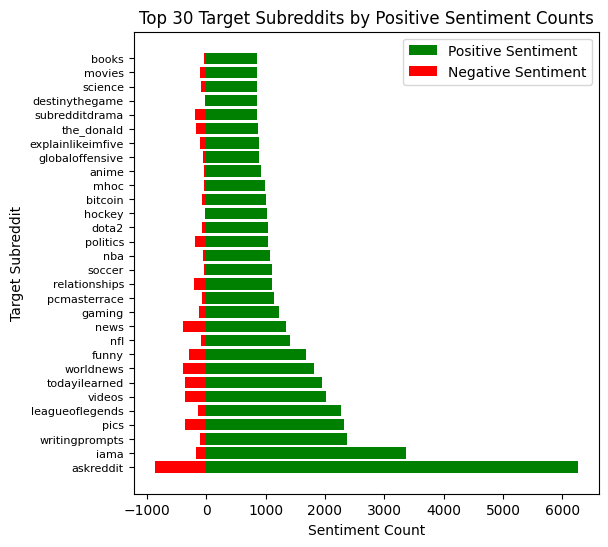

In [152]:

# Sort target subreddits by the number of positive sentiments
sorted_target_subreddits = sentiment_counts[1].sort_values(ascending=False)
# Take the top `headsize` target subreddits with the most positive sentiments
top_target_subreddits = sorted_target_subreddits.head(headsize)
# Get the corresponding number of negative sentiments for the top target subreddits
negative_sentiments = sentiment_counts.loc[top_target_subreddits.index, -1]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
# Plot the top target subreddits with positive and negative sentiments
ax.barh(top_target_subreddits.index, top_target_subreddits.values, color='green', label='Positive Sentiment')
ax.barh(top_target_subreddits.index, -negative_sentiments.values, color='red', label='Negative Sentiment')
# Set labels and title
ax.set_xlabel('Sentiment Count')
ax.set_ylabel('Target Subreddit')
ax.set_title(f'Top {headsize} Target Subreddits by Positive Sentiment Counts')
# Add a legend
ax.legend()
# Show the plot
plt.yticks(fontsize=8)
plt.show()

In [153]:
# Group by source subreddit and calculate statistics
subreddit_stats_src = train_data.groupby('SOURCE_SUBREDDIT').agg({
    'LINK_SENTIMENT': 'count'  # Count of total posts
})

# Rename the column for clarity
subreddit_stats_src.columns = ['num_posts']

# Calculate the ratio of total posts to positive sentiment (1)
subreddit_stats_src['pos_percentage'] =  train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count() / subreddit_stats_src['num_posts']

# Calculate the ratio of total posts to negative sentiment (-1)
subreddit_stats_src['neg_percentage'] = train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count() / subreddit_stats_src['num_posts'] 

subreddit_stats_src['pos_to_neg_ratio'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count() / train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()
subreddit_stats_src['pos'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()
subreddit_stats_src['neg'] = train_data[train_data['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

subreddit_stats_src.fillna(0, inplace=True)


In [154]:

# Display the resulting statistics for each subreddit
subreddit_stats_src.sample(n=15)

,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
SOURCE_SUBREDDIT,,,,,,
basicliving,1,1.000,0.000,0.000000,1.0,0.0
r4rindia,1,1.000,0.000,0.000000,1.0,0.0
nafindix,2,1.000,0.000,0.000000,2.0,0.0
seo_nuke,80,0.925,0.075,12.333333,74.0,6.0
rx8,3,1.000,0.000,0.000000,3.0,0.0
progressiveactivism,5,1.000,0.000,0.000000,5.0,0.0
sodapoppin,1,1.000,0.000,0.000000,1.0,0.0
competitivewow,15,1.000,0.000,0.000000,15.0,0.0
ancientknowledge,1,1.000,0.000,0.000000,1.0,0.0


In [155]:
# Top X most positive Subreddits > 5 posts
subreddit_stats_src[subreddit_stats_src['num_posts'] > 5].sort_values(by=['pos_percentage','num_posts'], ascending=False).head(10)

,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
SOURCE_SUBREDDIT,,,,,,
trendingsubreddits,568,1.0,0.0,0.0,568.0,0.0
reddoge,436,1.0,0.0,0.0,436.0,0.0
thenetherlands,431,1.0,0.0,0.0,431.0,0.0
bluejackets,371,1.0,0.0,0.0,371.0,0.0
longhornnation,342,1.0,0.0,0.0,342.0,0.0
forhire,295,1.0,0.0,0.0,295.0,0.0
mushroomkingdom,270,1.0,0.0,0.0,270.0,0.0
everysinglethread,231,1.0,0.0,0.0,231.0,0.0
sportsbook,210,1.0,0.0,0.0,210.0,0.0


In [156]:
# Top X most negative Subreddits > 5 posts
subreddit_stats_src[subreddit_stats_src['num_posts'] > 5].sort_values(by=['neg_percentage','num_posts'], ascending=False).head(10)

,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
SOURCE_SUBREDDIT,,,,,,
respectfullyyours,12,0.000000,1.000000,0.000000,0.0,12.0
christianlaughs,8,0.000000,1.000000,0.000000,0.0,8.0
fuckredditmods,7,0.000000,1.000000,0.000000,0.0,7.0
redditliars,7,0.000000,1.000000,0.000000,0.0,7.0
bitchaboutrsoccer,8,0.125000,0.875000,0.142857,1.0,7.0
shitsassay,8,0.125000,0.875000,0.142857,1.0,7.0
wallpaperdump,8,0.125000,0.875000,0.142857,1.0,7.0
iamnotracistbut,7,0.142857,0.857143,0.166667,1.0,6.0
randomshit,13,0.153846,0.846154,0.181818,2.0,11.0


In [157]:
# Group by target subreddit and calculate statistics
subreddit_stats_target = train_data.groupby('TARGET_SUBREDDIT').agg({
    'LINK_SENTIMENT': 'count'  # Count of total posts
})

# Rename the column for clarity
subreddit_stats_target.columns = ['num_posts']

# Calculate the ratio of total posts to positive sentiment (1)
subreddit_stats_target['pos_percentage'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('TARGET_SUBREDDIT')['LINK_SENTIMENT'].count() / subreddit_stats_target['num_posts']
# Calculate the ratio of total posts to negative sentiment (-1)
subreddit_stats_target['neg_percentage'] = train_data[train_data['LINK_SENTIMENT'] == -1].groupby('TARGET_SUBREDDIT')['LINK_SENTIMENT'].count() / subreddit_stats_target['num_posts']

subreddit_stats_target['pos_to_neg_ratio'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('TARGET_SUBREDDIT')['LINK_SENTIMENT'].count() / train_data[train_data['LINK_SENTIMENT'] == -1].groupby('TARGET_SUBREDDIT')['LINK_SENTIMENT'].count()
subreddit_stats_target['pos'] = train_data[train_data['LINK_SENTIMENT'] == 1].groupby('TARGET_SUBREDDIT')['LINK_SENTIMENT'].count()
subreddit_stats_target['neg'] = train_data[train_data['LINK_SENTIMENT'] == -1].groupby('TARGET_SUBREDDIT')['LINK_SENTIMENT'].count()

subreddit_stats_target.fillna(0, inplace=True)

In [158]:
# Display the resulting statistics for a sample of subreddits
subreddit_stats_target.sample(n=15)

,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
TARGET_SUBREDDIT,,,,,,
mcwt,2,1.000000,0.000000,0.0,2.0,0.0
web,1,1.000000,0.000000,0.0,1.0,0.0
silphroadafrica,1,1.000000,0.000000,0.0,1.0,0.0
pawg,4,1.000000,0.000000,0.0,4.0,0.0
afterthesilence,1,1.000000,0.000000,0.0,1.0,0.0
bbcsluts,7,1.000000,0.000000,0.0,7.0,0.0
katsumikato,2,1.000000,0.000000,0.0,2.0,0.0
data,1,1.000000,0.000000,0.0,1.0,0.0
intj,54,0.888889,0.111111,8.0,48.0,6.0


In [159]:
# Top X most positive Subreddits > 5 posts
subreddit_stats_target[subreddit_stats_target['num_posts'] > 5].sort_values(by=['pos_percentage','num_posts'], ascending=False).head(10)

,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
TARGET_SUBREDDIT,,,,,,
soccerstreams,493,1.0,0.0,0.0,493.0,0.0
testimonials,338,1.0,0.0,0.0,338.0,0.0
ratemymayor,298,1.0,0.0,0.0,298.0,0.0
footballhighlights,294,1.0,0.0,0.0,294.0,0.0
chibears,241,1.0,0.0,0.0,241.0,0.0
bluejacketsgwg,223,1.0,0.0,0.0,223.0,0.0
podemos,219,1.0,0.0,0.0,219.0,0.0
freeebooks,167,1.0,0.0,0.0,167.0,0.0
azcardinals,160,1.0,0.0,0.0,160.0,0.0


In [160]:
# Top X most negative Subreddits > 5 posts
subreddit_stats_target[subreddit_stats_target['num_posts'] > 5].sort_values(by=['neg_percentage','num_posts'], ascending=False).head(10)

,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
TARGET_SUBREDDIT,,,,,,
biggestproblem,6,0.000000,1.000000,0.000000,0.0,6.0
databreaches,6,0.000000,1.000000,0.000000,0.0,6.0
hearthstonecirclejerk,36,0.138889,0.861111,0.161290,5.0,31.0
als,6,0.166667,0.833333,0.200000,1.0,5.0
itspronouncedgif,6,0.166667,0.833333,0.200000,1.0,5.0
steamship,10,0.300000,0.700000,0.428571,3.0,7.0
badlegaladvice,6,0.333333,0.666667,0.500000,2.0,4.0
impeach_trump,6,0.333333,0.666667,0.500000,2.0,4.0
dailyshow,11,0.363636,0.636364,0.571429,4.0,7.0


In [191]:
# Positive ratio: 'neg' == 0 for pure, 'neg' != 0 for non-pure - naming is wrong but stats should be right
negative_subs_src = subreddit_stats_src[subreddit_stats_src['pos_to_neg_ratio'] > 1 & (subreddit_stats_src['neg'] != 0) & (subreddit_stats_src['pos'] != 0)]

print(negative_subs_src.shape[0])
print(negative_subs_src['num_posts'].sum())
negative_subs_src.sample(n=15)

3162
189898


,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
SOURCE_SUBREDDIT,,,,,,
labrats,20,0.950000,0.050000,19.000000,19.0,1.0
allaccessplaylists,14,0.857143,0.142857,6.000000,12.0,2.0
mdma,31,0.903226,0.096774,9.333333,28.0,3.0
sandersforpresident,312,0.935897,0.064103,14.600000,292.0,20.0
spinalcordinjuries,3,0.666667,0.333333,2.000000,2.0,1.0
srsquestions,9,0.777778,0.222222,3.500000,7.0,2.0
muse,15,0.933333,0.066667,14.000000,14.0,1.0
syriancivilwar,20,0.950000,0.050000,19.000000,19.0,1.0
bdsmpersonals,52,0.826923,0.173077,4.777778,43.0,9.0


In [205]:
# Negative ratio: 'pos' == 0 for pure, 'pos' != 0 for non-pure
negative_subs_src = subreddit_stats_src[subreddit_stats_src['pos_to_neg_ratio'] < 1 & (subreddit_stats_src['pos'] == 0) & (subreddit_stats_src['neg'] != 0)]


print(negative_subs_src.shape[0])
print(negative_subs_src['num_posts'].sum())
negative_subs_src.sample(n=15)

579
697


,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
SOURCE_SUBREDDIT,,,,,,
careless,1,0.0,1.0,0.0,0.0,1.0
itppowers,2,0.0,1.0,0.0,0.0,2.0
uncensoreddb,1,0.0,1.0,0.0,0.0,1.0
mainindia,1,0.0,1.0,0.0,0.0,1.0
pprpconspiracy,1,0.0,1.0,0.0,0.0,1.0
brassholes,1,0.0,1.0,0.0,0.0,1.0
louisck,1,0.0,1.0,0.0,0.0,1.0
realrule34,1,0.0,1.0,0.0,0.0,1.0
aidanpics,4,0.0,1.0,0.0,0.0,4.0


In [204]:
# Positive ratio: 'neg' == 0 for pure, 'neg' != 0 for non-pure NOT WORK WHY
negative_subs_target = subreddit_stats_target[(subreddit_stats_target['pos'] != 0) & (subreddit_stats_target['neg'] == 0)]


print(negative_subs_target.shape[0])
print(negative_subs_target['num_posts'].sum())
negative_subs_target.sample(n=15)

16562
64311


,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
TARGET_SUBREDDIT,,,,,,
varicocele,3,1.0,0.0,0.0,3.0,0.0
universityofkansas,1,1.0,0.0,0.0,1.0,0.0
ottawajobsearch,1,1.0,0.0,0.0,1.0,0.0
adsense,1,1.0,0.0,0.0,1.0,0.0
tallmeettall,4,1.0,0.0,0.0,4.0,0.0
lolgrindr,1,1.0,0.0,0.0,1.0,0.0
arisia,2,1.0,0.0,0.0,2.0,0.0
r4rstralia,15,1.0,0.0,0.0,15.0,0.0
cryptoanarchy,9,1.0,0.0,0.0,9.0,0.0


In [207]:
# Negative ratio: 'pos' == 0 for pure, 'pos' != 0 for non-pure
negative_subs_target = subreddit_stats_target[subreddit_stats_target['pos_to_neg_ratio'] < 1 & (subreddit_stats_target['pos'] == 0) & (subreddit_stats_target['neg'] != 0)]


print(negative_subs_target.shape[0])
print(negative_subs_target['num_posts'].sum())
negative_subs_target.sample(n=15)

488
549


,num_posts,pos_percentage,neg_percentage,pos_to_neg_ratio,pos,neg
TARGET_SUBREDDIT,,,,,,
neurofeedback,1,0.0,1.0,0.0,0.0,1.0
pokemoncirclejerk,1,0.0,1.0,0.0,0.0,1.0
tsbd,1,0.0,1.0,0.0,0.0,1.0
poopsacks,1,0.0,1.0,0.0,0.0,1.0
crowdfunding,2,0.0,1.0,0.0,0.0,2.0
letitdie,1,0.0,1.0,0.0,0.0,1.0
myterribleneighbors,1,0.0,1.0,0.0,0.0,1.0
dystopia,1,0.0,1.0,0.0,0.0,1.0
facebookdrama,1,0.0,1.0,0.0,0.0,1.0


In [164]:
subreddit_stats_src['pos_to_neg_ratio'].nlargest(10)

SOURCE_SUBREDDIT
soccer              456.0
newsokur            421.0
atletico            304.0
panthers            277.0
fireemblemcasual    270.0
steelers            253.0
linuxquestions      246.0
seahawks            244.0
fireteams           236.0
chibears            224.0
Name: pos_to_neg_ratio, dtype: float64

In [206]:
subreddit_stats_src['pos_to_neg_ratio'].nsmallest(10)

SOURCE_SUBREDDIT
07scape               0.0
0magick               0.0
0x10c                 0.0
1000wordstories       0.0
100daysofketo         0.0
100movies365days      0.0
100thieves            0.0
100yearclub           0.0
1022                  0.0
104thworldproblems    0.0
Name: pos_to_neg_ratio, dtype: float64

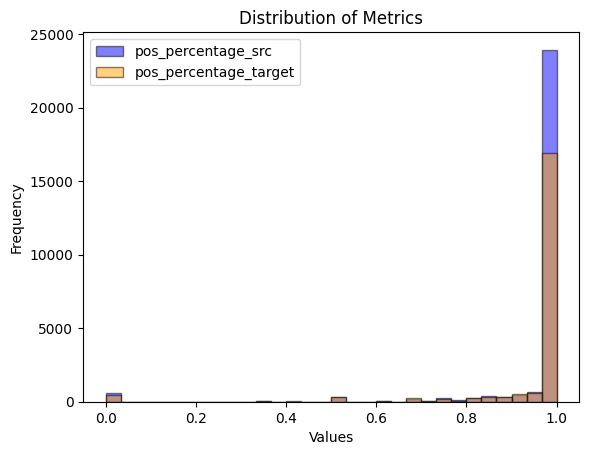

In [165]:
# Create a histogram for 'pos_percentage'
plt.hist(subreddit_stats_src['pos_percentage'], bins=30, alpha=0.5, label='pos_percentage_src', color='blue', edgecolor='black')

# Create a histogram for 'pos_percentage'
plt.hist(subreddit_stats_target['pos_percentage'], bins=30, alpha=0.5, label='pos_percentage_target', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Metrics')

# Add a legend
plt.legend()

# Show the plot
plt.show()

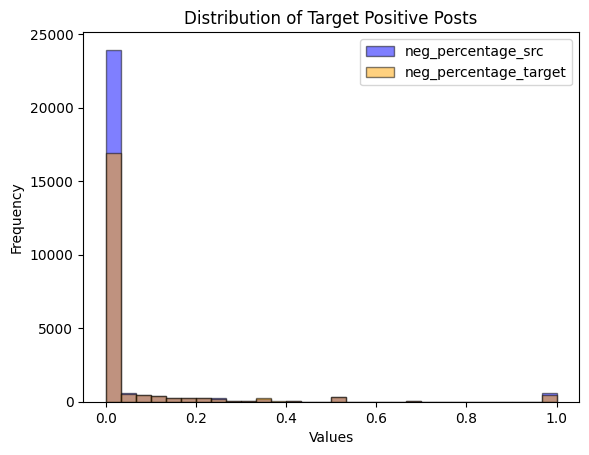

In [166]:
# Create a histogram for 'pos_percentage'
plt.hist(subreddit_stats_src['neg_percentage'], bins=30, alpha=0.5, label='neg_percentage_src', color='blue', edgecolor='black')

# Create a histogram for 'pos_percentage'
plt.hist(subreddit_stats_target['neg_percentage'], bins=30, alpha=0.5, label='neg_percentage_target', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Target Positive Posts')

# Add a legend
plt.legend()

# Show the plot
plt.show()